In [1]:
from qiskit import QuantumCircuit

from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

from math import pi
from qiskit.visualization import plot_histogram

## Measurements

first, x-measurement: adding H gate before measure gate

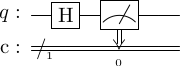

In [2]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw('latex')

z-measurement: just a measure gate

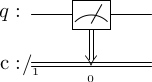

In [3]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw('latex')

there's also something called y-measurement, but we'll save it for later.<br>
now do some measurement on different qubits/states

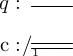

In [4]:
# using |0>
qc = QuantumCircuit(1,1)

qc.draw('latex')

In [5]:
print('Results from z measurement:',
      backend.run(qc.compose(meas_z)).result().get_counts())
print('Results from x measurement:',
      backend.run(qc.compose(meas_x)).result().get_counts())

Results from z measurement: {'0': 1024}
Results from x measurement: {'0': 503, '1': 521}


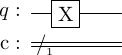

In [6]:
# using |1>
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw('latex')

In [7]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'1': 498, '0': 526}


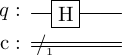

In [8]:
# using |+>
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw('latex')

In [9]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'0': 477, '1': 547}
Results from x measurement: {'0': 1024}


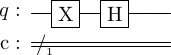

In [10]:
# using |->
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)

qc.draw('latex')

In [11]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'0': 507, '1': 517}
Results from x measurement: {'1': 1024}


Let's do some rotations on y-axis

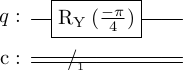

In [12]:
qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

qc.draw('latex')

In [13]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 141, '0': 883}
Results from x measurement: {'0': 120, '1': 904}


## Unique quantum correlation

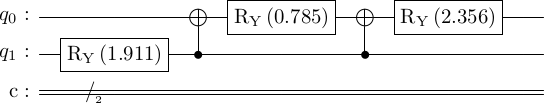

In [14]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)
qc_charlie.draw('latex')

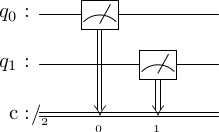

In [15]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])
meas_zz.draw('latex')

Results for z measurements:


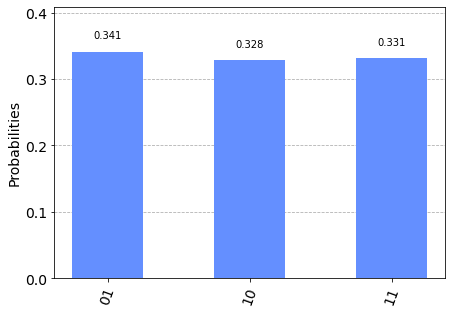

In [16]:
print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

(Observation A) Never found 00 from zz measurement

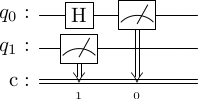

In [17]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])
meas_zx.draw('latex')

Results for a z and an x measurement:


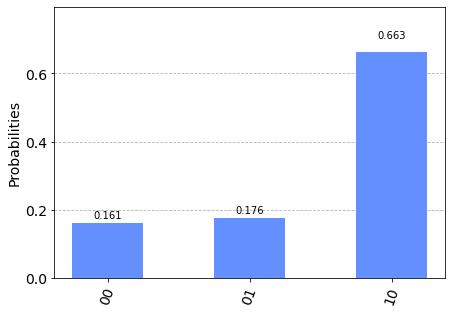

In [18]:
print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

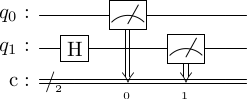

In [19]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])
meas_xz.draw('latex')

Results for an x and a z measurement:


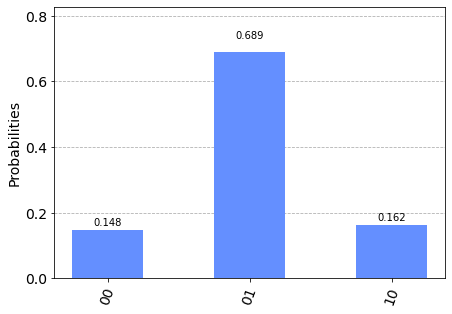

In [20]:
print('Results for an x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

(Observation B) never found 11 in either xz or zx measurement

By logic*, we shouldn't find 11 in an xx measurement. Let's find out.

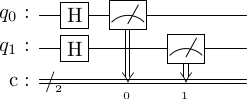

In [21]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])
meas_xx.draw('latex')

Results for an x and an x measurement:


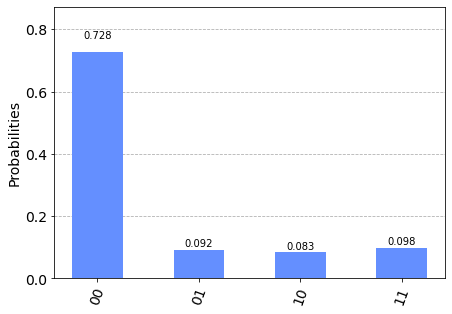

In [22]:
print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

The results of qubits are not well-defined before measurement. Though this might seem like it means that qubits are more random that classical variables, it is not always a negative quality. It also means that restrictions applied to classical variables do not always apply to qubits, and that quantum correlations can have properties that would be impossible classically. These unique correlations are one of the signature properties of entangled states.<br>
(Words taken from Qiskit textbook)

*explanation:<br>
from observation A: there's no way for both qubits to be in state 0<br>
from observation B: if one qubit is measured 1, the other must be 0:
* if measured x of a qubit is 1, the other z must be 0
* if measured z of a qubit is 1, the other x must be 0<br>

from the first point, if both qubits x-measurement yield 1, then the z-measurement from both qubits must yield 0, which violates observation A.